# 电力数据分析

In [2]:
# 导入所用的包
import numpy as np
import pandas as pd

## 功能 - 数据导入 并 设置表头

In [3]:
# 读取数据 并建立表头
# data = pd.read_csv('dataInfo_2016_12.CSV',header=None, names=["date_time", "id","number"])
data = pd.read_csv('dataInfo_2017.CSV',header=None, names=["date_time", "id","number"])

## 功能 - 查看部分数据样本

In [3]:
# 显示读取的数据
data.head()

,date_time,id,number
0,2017-01-01 00:00:01,960111FF07FF104A,514286.406
1,2017-01-01 00:00:01,960111FF07FF127E,0.000
2,2017-01-01 00:00:01,960111FF07FF127F,0.000
3,2017-01-01 00:00:01,960111FF07FF1280,0.000
4,2017-01-01 00:00:01,960111FF07FF128E,0.000


# 设备id 对应的设备名称


|设备ID	|设备名称|
| :--------:   | :-----:  | 
| 9601110301	| 智能电表(1F低配室_1#林洋DTS72)| 
| 960111FF01	| 进线柜(1F低配室_1#维博WBZ)| 
| 960111FF02	| 智能电表(1F低配室_1#安科瑞DTSF)| 
| 960111FF03	| 智能电表(1F低配室_1#安科瑞AMC16)| 
| 960111FF04	| 智能电表(1F低配室_2#安科瑞AMC16)| 
| 960111FF06	| 智能电表(1F低配室_2#安科瑞DTSF)| 
| 960111FF07	| 智能电表(1F低配室_3#安科瑞DTSF)| 
| 960112FF01	| 低压配电屏(2F电力室_维博_WB)| 
| 9601210301	| 发电机组(1#辛普森_MEC20)| 
| 9601210302	| 发电机组(2#辛普森_MEC20)| 
| 9601320B01	| 开关电源(2F电力机房_1#施威特克_E40)| 
| 9601340101	| 蓄电池组(2F电力机房_1#施威特克_1#汤浅1000)| 
| 9601340102	| 蓄电池组(2F电力机房_1#施威特克_1#汤浅1000)| 
| 9601430A01	| UPS(2F电力机房_1#UPS系统2#主机_华为)| 


观察发下元数据中的id的前半部分对应于设备id，后半部分应该为设备的不同监控信号，将元数据的id分列为 id和sub_id

In [18]:
# 显示数据说明书样例
doc = pd.read_csv('doc.CSV',encoding="gb2312")
doc.head()

,Unnamed: 0,区域,局站,设备,监控点_名称,监控点_显示标题,ID,采集单元ID,输入通道号,输出通道号,...,告警上限,告警下限,存储方式,变化阀值,时间阀值,是否显示,恢复阈值,楼层ID,点位_X,点位_Y
0,1,庆元县,丽_B_庆元庆元县局,智能电表(1F低配室_1#林洋DTS72),有功电度 ...,有功电度 ...,9601110301FF1048,960171FF012220A3,0,-1,...,100000000.0,0.0,3,2.0,1,1,1.0,NaN,0.0,0.0
1,2,庆元县,丽_B_庆元庆元县局,进线柜(1F低配室_1#维博WBZ),市电来电通知 ...,市电来电通知 ...,960111FF01FF20D0,NaN,-1,-1,...,0.5,0.0,1,0.5,1,1,0.0,NaN,0.0,0.0
2,3,庆元县,丽_B_庆元庆元县局,进线柜(1F低配室_1#维博WBZ),A相交流输入电压 ...,A相交流输入电压 ...,960111FF01FF1001,960171FF010520A3,5,-1,...,270.0,170.0,3,5.0,1,1,1.0,NaN,0.0,0.0
3,4,庆元县,丽_B_庆元庆元县局,进线柜(1F低配室_1#维博WBZ),市电来电时间 ...,市电来电时间 ...,960111FF01FF1102,NaN,-1,-1,...,1.0,0.0,0,0.0,1,1,0.0,NaN,0.0,0.0
4,5,庆元县,丽_B_庆元庆元县局,进线柜(1F低配室_1#维博WBZ),市电停电时间 ...,市电停电时间 ...,960111FF01FF1101,NaN,-1,-1,...,1.0,0.0,0,0.0,1,1,0.0,NaN,0.0,0.0


In [25]:
doc1= doc[["设备","监控点_显示标题","ID","告警上限","告警下限"]]
# print(doc1)
for id in doc['ID']:
# id = '960111FF02FF1045'
    max_value = doc1[['告警上限']][doc1['ID'] == id].values[0][0]
    min_value = doc1[['告警下限']][doc1['ID'] == id].values[0][0]
    name = doc1[['设备']][doc1['ID'] == id].values[0][0]
    title = doc1[['监控点_显示标题']][doc1['ID'] == id].values[0][0]
    print(name + ' '+ title + '  ID:'+ id + '  告警上限 :' + str(max_value) + '  告警下限 :' + str(min_value))
    print('***************************')
    print('统计值: ')
    print(data[(data['id']==id)].describe().astype(np.float).T)
#     print('最大值')
#     print(data[['number']][(data['id']==id)].max())
#     min_value = doc1[['告警下限']][doc1['ID'] == id].values[0][0]
    print('***************************')
    abnormal_overmax = data[(data['id']==id) & (data['number'] > max_value)]
    if not abnormal_overmax.empty:
        print('异常值 : 超上限')
        print("超上限率: %0.2f %%" % (100*len(abnormal_overmax)/len(data[(data['id']==id)] )))
        print("超上限数值样例： " )
        print(abnormal_overmax.head())
    print('***************************')
    abnormal_overmin = data[(data['id']==id) & (data['number'] < min_value)]
    if not abnormal_overmin.empty: 
        print('异常值 : 超下限')
        print("超下限率: %0.2f %%" % (100*len(abnormal_overmin)/len(data[(data['id']==id)] )))
        print("超下限数值样例： " )
        print(abnormal_overmin.head())
    print('*****************************************************')

智能电表(1F低配室_1#林洋DTS72) 有功电度                                                                                              ID:9601110301FF1048  告警上限 :100000000.0  告警下限 :0.0
***************************
统计值: 
        count  mean  std  min  25%  50%  75%  max
number    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
***************************
***************************
*****************************************************
进线柜(1F低配室_1#维博WBZ) 市电来电通知                                                                                          ID:960111FF01FF20D0  告警上限 :0.5  告警下限 :0.0
***************************
统计值: 
        count      mean      std  min  25%  50%  75%  max
number   27.0  0.074074  0.26688  0.0  0.0  0.0  0.0  1.0
***************************
异常值 : 超上限
超上限率: 7.41 %
超上限数值样例： 
                  date_time                id  number
178551  2016-12-08 06:27:27  960111FF01FF20D0     1.0
377434  2016-12-16 10:46:28  960111FF01FF20D0     1.0
***************************
****************************

KeyboardInterrupt: 

## 功能 - 单列数据切分为多列

In [5]:
data['id'], data['sub_id'] = map(data['id'].str.slice, [0, 10 ], [10, 16])

In [5]:
# 显示分列后的数据
data.head()

,date_time,id,number,sub_id
0,2017-01-01 00:00:01,960111FF07,514286.406,FF104A
1,2017-01-01 00:00:01,960111FF07,0.000,FF127E
2,2017-01-01 00:00:01,960111FF07,0.000,FF127F
3,2017-01-01 00:00:01,960111FF07,0.000,FF1280
4,2017-01-01 00:00:01,960111FF07,0.000,FF128E


统计元数据所记录的设备ID的种类，观察发现共记录了13种不同的设备，与说明文档中所描述的14项相比，少了 9601110301 一项(智能电表)

## 功能 - 统计不重复值

In [6]:
unique_id = data['id'].unique()
print('所有的设备ID如下： \n',unique_id)

所有的设备ID如下： 
 ['960111FF07' '9601340101' '9601340102' '960111FF02' '960111FF03'
 '9601320B01' '960111FF04' '960111FF01' '9601210301' '9601430A01'
 '960111FF06' '960112FF01' '9601210302']


统计每个设备ID下有多少个监控信号

In [31]:
for  i in unique_id:
    u = data[data['id']==i]['sub_id'].unique()
    print('设备ID为：' + i +'的监控信号有'+ str(np.count_nonzero(u))+'个,如下所示：\n',u )

设备ID为：960111FF01的监控信号有20个,如下所示：
 ['FF1048' 'FF1007' 'FF1008' 'FF1009' 'FF1039' 'FF103A' 'FF1045' 'FF1047'
 'FF1003' 'FF1002' 'FF1001' 'FF1004' 'FF1005' 'FF1006' 'FF1046' 'FF10DB'
 'FF1040' 'FF1044' 'FF208C' 'FF20D0']
设备ID为：9601340101的监控信号有30个,如下所示：
 ['011083' '021083' '031083' '041083' '051083' '051084' '061083' '071083'
 '081083' '091083' '0A1083' '0B1083' '0C1083' '0D1083' '0E1083' '0F1083'
 '101083' '111083' '121083' '121084' '131083' '141083' '151083' '161083'
 '171083' '181083' 'FF1082' 'FF10D0' 'FF10D1' 'FF10D2']
设备ID为：9601340102的监控信号有30个,如下所示：
 ['011083' '021083' '031083' '041083' '051083' '051084' '061083' '071083'
 '081083' '091083' '0A1083' '0B1083' '0C1083' '0D1083' '0E1083' '0F1083'
 '101083' '111083' '121083' '121084' '131083' '141083' '151083' '161083'
 '171083' '181083' 'FF1082' 'FF10D0' 'FF10D1' 'FF10D2']
设备ID为：960111FF02的监控信号有20个,如下所示：
 ['FF1048' 'FF112A' 'FF107E' 'FF1049' 'FF107F' 'FF1044' 'FF1040' 'FF1045'
 'FF1046' 'FF1047' 'FF1097' 'FF1098' 'FF1099' 'FF10CF' 'FF100

## 功能 - 数据统计描述

进线柜的电压不平衡度的描述统计值

In [25]:
data[(data['id']=='9601430A01') & (data['sub_id']=='FF20FF')].describe().astype(np.float).T

,count,mean,std,min,25%,50%,75%,max
number,15.0,0.666667,1.175139,0.0,0.0,0.0,1.0,3.0


In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
# & (data['number']>0)
aaa = data[['date_time','number']][(data['id']=='9601430A01') & (data['sub_id']=='FF2093')]

In [79]:
# aaa.describe().astype(np.float).T
aaa

,date_time,number


进线柜的电压不平衡度的元数据值

## 功能 - 按条件筛选数据

In [33]:
N_cur=data[(data['id']=='960111FF01') & (data['sub_id']=='FF10DB')]
N_cur.head()

,date_time,id,number,sub_id
797,2016-12-01 00:47:55,960111FF01,30.040001,FF10DB
1722,2016-12-01 01:48:09,960111FF01,31.320000,FF10DB
2689,2016-12-01 02:48:24,960111FF01,27.879999,FF10DB
3669,2016-12-01 03:48:26,960111FF01,26.920000,FF10DB
4644,2016-12-01 04:48:28,960111FF01,25.040001,FF10DB


## 功能 - 保存为 CSV

In [36]:
N_cur.to_csv('N_cur.csv')

In [26]:
data = pd.read_csv('dataInfo_2017.CSV',header=None, names=["date_time", "id","number"])
N_cur_2017=data[(data['id']=='960111FF01FF10DB')]
N_cur_2017.to_csv('N_cur_2017.csv')

## 功能 -  读取 CSV 并处理时间

In [27]:
N_cur = pd.read_csv('N_cur_2017.csv')
N_cur['date'] = pd.to_datetime(N_cur['date_time'], format='%Y-%m-%d')
N_cur=N_cur.set_index(['date'])
N_cur=N_cur.loc[:,'number']
print(N_cur.head())
# print(N_cur.dtypes)
# print(N_cur.index)

date
2017-01-01 00:16:24    24.920000
2017-01-01 01:16:38    23.959999
2017-01-01 02:16:48    22.639999
2017-01-01 03:17:19    23.040001
2017-01-01 04:17:30    22.280001
Name: number, dtype: float64


In [7]:
N_cur['2016-12-02 00']

date
2016-12-02 00:52:34    22.4
Name: number, dtype: float64

## 功能 - 图像显示

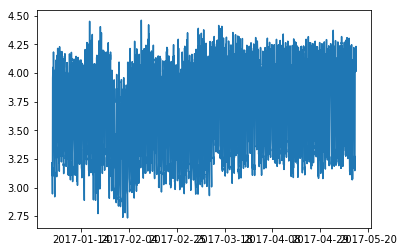

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
N_cur_log = np.log(N_cur)
plt.plot(N_cur_log)

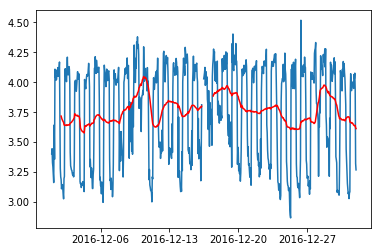

In [16]:
moving_avg = N_cur_log.rolling(center=False,window=24).mean()
                             
plt.plot(N_cur_log)
plt.plot(moving_avg, color='red')

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24*30)
    rolstd = pd.rolling_std(timeseries, window=24*30)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=720).mean()
  """
C:\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=720).std()
  


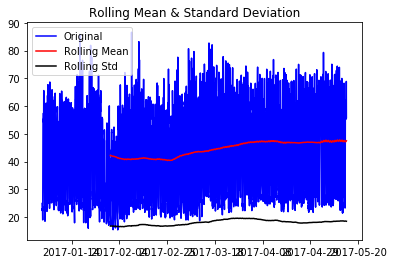

Results of Dickey-Fuller Test:
Test Statistic                   -4.167353
p-value                           0.000748
#Lags Used                       25.000000
Number of Observations Used    3162.000000
Critical Value (10%)             -2.567257
Critical Value (1%)              -3.432420
Critical Value (5%)              -2.862454
dtype: float64


In [32]:
test_stationarity(N_cur)

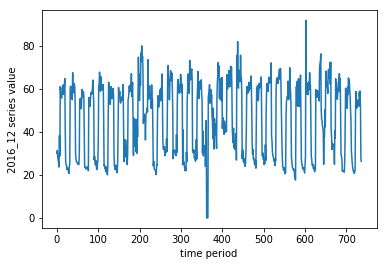

In [34]:
# 图像显示 2016_12 月N 相电流的变化情况
%matplotlib inline
import matplotlib.pyplot as plt
list_N_cur=N_cur['number']
min_ = min(list_N_cur)
max_ = max(list_N_cur)
normalized_N_cur = 2*(list_N_cur - min_)/(max_-min_)-1

plt.plot(list_N_cur.tolist())
plt.xlabel('time period')
plt.ylabel('2016_12 series value')
